In [31]:
#Line chart of sightings over the year

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
geocoded_data_file= pd.read_csv('../Bootcamp-Project-1/bfro_reports_geocoded.csv')
location_data_file= pd.read_csv('../Bootcamp-Project-1/bfro_locations.csv')
main_json=pd.read_json('../Bootcamp-Project-1/bfro_reports.json',encoding='utf-8',lines=True)
main_json.head()

C:\Users\qdale\AppData\Local\Temp\ipykernel_9368\991146047.py:9: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  main_json=pd.read_json('../Bootcamp-Project-1/bfro_reports.json',encoding='utf-8',lines=True)
C:\Users\qdale\AppData\Local\Temp\ipykernel_9368\991146047.py:9: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  main_json=pd.read_json('../Bootcamp-Project-1/bfro_reports.json',encoding='utf-8',lines=True)
C:\Users\qdale\AppData\Local\Temp\ipykernel_9368\991146047.py:9: FutureWarni

,YEAR,SEASON,MONTH,DATE,STATE,COUNTY,LOCATION_DETAILS,NEAREST_TOWN,NEAREST_ROAD,OBSERVED,ALSO_NOTICED,OTHER_WITNESSES,OTHER_STORIES,TIME_AND_CONDITIONS,ENVIRONMENT,REPORT_NUMBER,REPORT_CLASS,A_&_G_References
0,2000,Summer,June,23,Wyoming,Washakie County,"We were on our way to Rapid City, so we were h...",Tensleep,SR16,I am not sure how relevant this report will be...,Nothing,There was one passenger in the car and a drive...,None,"It was around Noon, bright Sunny day.","Mountainous Forest, on very steep hills, numer...",798.0,Class B,NaN
1,2005,Winter,December,12-03-05,West Virginia,Wyoming County,"Heading to the deep mine Poca #2, the airshaft...",AMGIO (Left Fork Mines),Mine haul road,I don't know if what I saw was two bigfoots or...,Only when the first one did this clapping moti...,NO,NO,The time was exactly 2:40 PM. The weather cond...,There was a little stream and a lot of trees k...,13237.0,Class A,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,2005,Fall,October,8,Vermont,Windsor County,It's off Rt 100 outside of Ludlow Vermont. It ...,Ludlow,Tyson Road,"My family and I went to Ludlow, Vermont for Co...","The day before we had driven the same area, di...",There were three of us in the car. Only two of...,I've been told that the locals just warn kids ...,It was evening but with the moon and the headl...,At that point the road is bordered by woods an...,13285.0,Class A,NaN


In [44]:
#Data Cleaning


#I only really care about a few of these pieces of data in constructing my dataset as I am only trying to show bigfoot sightings by year and report class,
#so I only want to clean those so I can retain as much data as I can

clean_main_json = main_json.dropna(subset=['YEAR', 'REPORT_CLASS'])

#Some columns include things like "1974 or 1975". I will remove these as non-numeric values and use coercion to convert errors to NaN
clean_main_json['YEAR'] = pd.to_numeric(clean_main_json['YEAR'], errors='coerce')

# Drop new NaN rows in YEAR from
clean_main_json = clean_main_json.dropna(subset=['YEAR'])

# Convert YEAR to integer using .loc to avoid SettingWithCopyWarning
clean_main_json.loc[:, 'YEAR'] = clean_main_json['YEAR'].astype(int)

# Filter out any of the year values that don't make a ton of sense (e.g., probably those outside the range 1910-2024)
clean_main_json = clean_main_json[(clean_main_json['YEAR'] >= 1900) & (clean_main_json['YEAR'] <= 2024)]

# Retain only the relevant columns for analysis
clean_main_json = clean_main_json[['YEAR', 'REPORT_CLASS']]

# Print the cleaned dataframe summary to doublecheck data
print(clean_main_json.info())
print(clean_main_json.head())



<class 'pandas.core.frame.DataFrame'>
Index: 4705 entries, 0 to 5545
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YEAR          4705 non-null   float64
 1   REPORT_CLASS  4705 non-null   object 
dtypes: float64(1), object(1)
memory usage: 110.3+ KB
None
     YEAR REPORT_CLASS
0  2000.0      Class B
1  2005.0      Class A
4  2005.0      Class A
5  1984.0      Class A
7  1996.0      Class A


C:\Users\qdale\AppData\Local\Temp\ipykernel_9368\2038412762.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_main_json['YEAR'] = pd.to_numeric(clean_main_json['YEAR'], errors='coerce')


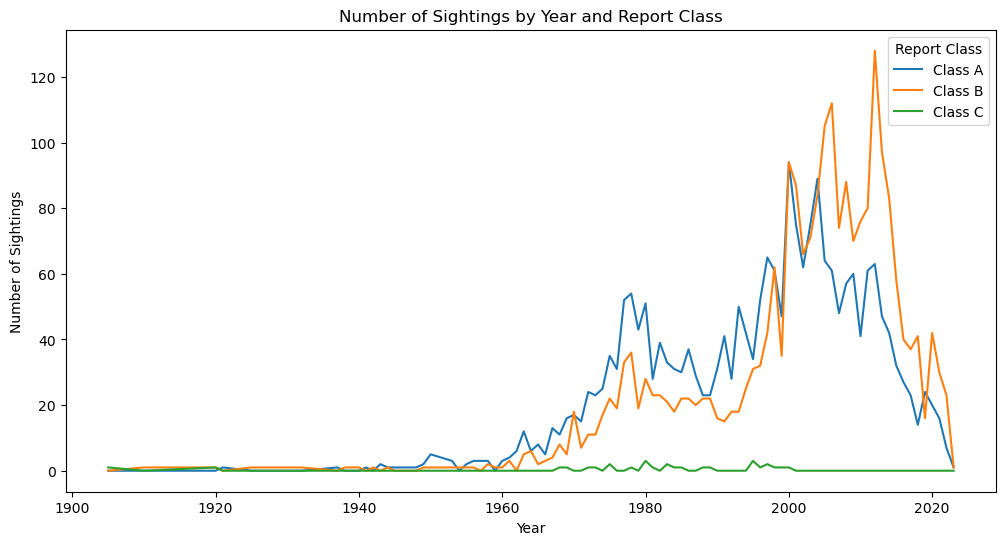

In [49]:

# I need to find sightings by year and class, and this can be done through using a group by function
sightings_by_year = clean_main_json.groupby(['YEAR', 'REPORT_CLASS']).size().reset_index(name='counts')

# Pivot the data to get dates on right axis
sightings_pivot = sightings_by_year.pivot(index='YEAR', columns='REPORT_CLASS', values='counts').fillna(0)

# Plot the data
sightings_pivot.plot(kind='line', figsize=(12, 6))
plt.title('Number of Sightings by Year and Report Class')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.legend(title='Report Class')
plt.show()


